#  Trabalho prático 2  

O trabalho prático que se segue, destina-se à previsão se uma feature consoante os outros dados presente no csv. 

Numa primeira instância são importadas as librarias. 


In [83]:
import pandas as pd
import numpy as np  
from fancyimpute import KNN
import matplotlib.pyplot as plt
import seaborn as sns 
import csv 
import statistics 
%matplotlib inline

De seguida, é necessário importar os dados de teste de modo a avaliar o modelo numa primeira instância.

In [98]:
train=pd.read_csv("train_data.csv")

## Visualização dos dados

In [85]:
train.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
0,1,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,1
1,2,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,1
3,4,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,1
4,5,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,1


In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
ID                                 500 non-null int64
Reason for absence                 500 non-null int64
Month of absence                   500 non-null int64
Day of the week                    500 non-null int64
Seasons                            500 non-null int64
Transportation expense             500 non-null int64
Distance from Residence to Work    500 non-null int64
Service time                       500 non-null int64
Age                                500 non-null int64
Work load Average/day              500 non-null object
Hit target                         500 non-null int64
Disciplinary failure               500 non-null int64
Education                          500 non-null int64
Son                                500 non-null int64
Social drinker                     500 non-null int64
Social smoker                      500 non-null int64
Pet                           

In [87]:
train.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,19.288000,6.614000,3.88000,2.450000,223.640000,29.978000,12.650000,36.660000,94.168000,0.064000,1.204000,1.086000,0.620000,0.076000,0.628000,79.698000,172.098000,26.870000,0.790000
std,144.481833,8.543245,3.343555,1.43587,1.165425,67.323155,15.068498,4.036345,6.137731,3.912338,0.244998,0.561261,1.178721,0.485873,0.265264,1.071406,12.605101,6.234913,4.151092,0.407716
min,1.000000,0.000000,1.000000,2.00000,1.000000,118.000000,5.000000,3.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,125.750000,13.000000,3.750000,3.00000,1.000000,179.000000,16.000000,10.000000,33.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,1.000000
50%,250.500000,23.000000,7.000000,4.00000,2.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,1.000000
75%,375.250000,26.000000,9.000000,5.00000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,1.000000
max,500.000000,28.000000,12.000000,6.00000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,3.000000,4.000000,1.000000,1.000000,5.000000,108.000000,196.000000,38.000000,1.000000


## Análise dos dados 

Vamos criar alguns plots de modo a visualizar e explorar os dados, e a correlação entre alguns dados.

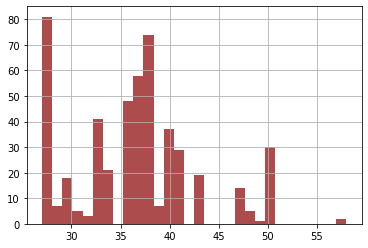

In [80]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

Pelo gráfico anterior, como é possível observar, os empregados da empresa possuem uma maior distribuição de empregados abixo do 30, sendo que entre os 35 e 40 anos também existe uma grande densidade de empregados.

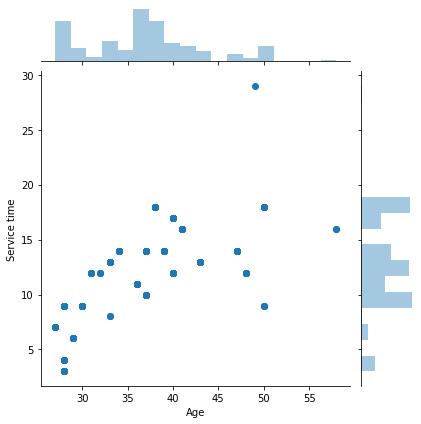

In [81]:
sns.jointplot(x='Age',y='Service time',data=train)

Por exemplo, através do pair plot anterior, é possível observar que funcionários de uma idade maior, trabalham em média mais horas que funcionários com uma idade inferior na empresa.

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Absent',data=train,palette='RdBu_r')

O countplot anterior contou o número de veres que os funcionários se ausentaram na empresa, como é possível observar, o número de ausências é bastante superior ao número de vezes que não se ausentaram. 

Continuando ainda com os countplots...

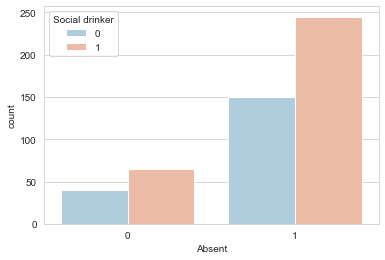

In [89]:
sns.set_style('whitegrid') 
sns.countplot(x='Absent',hue='Social drinker',data=train,palette='RdBu_r')

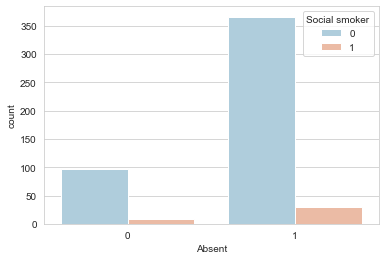

In [90]:
sns.set_style('whitegrid') 
sns.countplot(x='Absent',hue='Social smoker',data=train,palette='RdBu_r')

Como podemos ver pelos dois countplots anteriores, existe uma maior correlação de ausência se um funcionário for Social Drinker ao invés de ser Social Smoker.

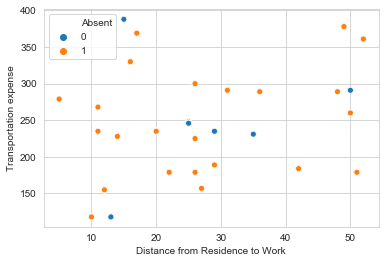

In [91]:
sns.scatterplot(x="Distance from Residence to Work",y="Transportation expense",hue="Absent",data=train)

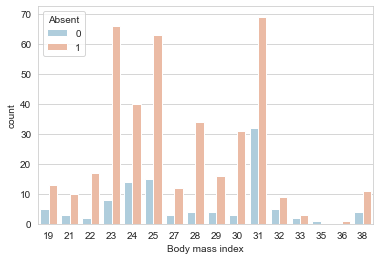

In [92]:
sns.set_style('whitegrid') 
sns.countplot(x='Body mass index',hue='Absent',data=train,palette='RdBu_r')

Portanto, e tal como seria expectável, aumentando o índice de massa corporal, maior será também o risco de ter que se ausentar do trabalho, uma vez que está mais sujeito a ter complicações com a sáude.

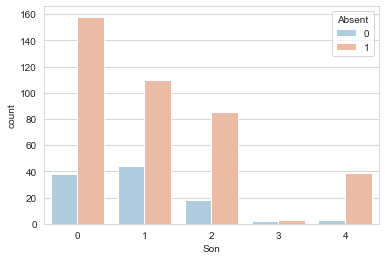

In [93]:
sns.set_style('whitegrid') 
sns.countplot(x='Son',hue='Absent',data=train,palette='RdBu_r')

C:\Users\joaon\AppData\Local\conda\conda\envs\env.aec\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
C:\Users\joaon\AppData\Local\conda\conda\envs\env.aec\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


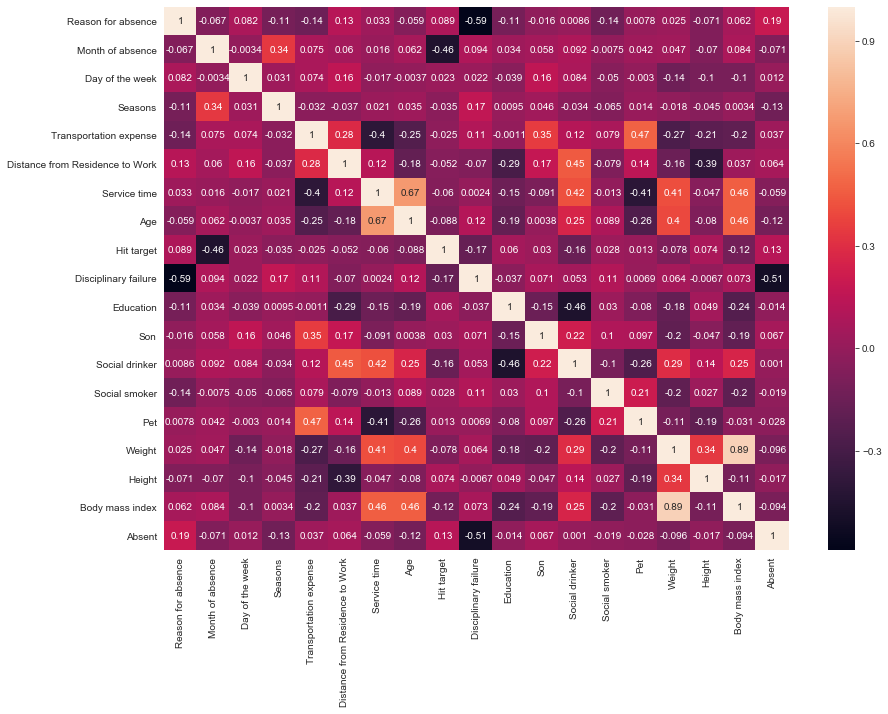

In [94]:
plt.figure(figsize = (14, 10))
heat = sns.heatmap(train.drop(['ID'],axis=1).corr(), annot = True)

Portanto, na figura anterior apresenta-se um heatmap de correlação entre as diversas features, sendo, por exemplo possível observar que o peso é altamente correlado com o body mass index.

## Preparação dos dados

In [99]:
train['Work load Average/day ']

0      239,554
1      239,554
2      239,554
3      239,554
4      239,554
5      239,554
6      239,554
7      239,554
8      239,554
9      239,554
10     239,554
11     239,554
12     239,554
13     239,554
14     239,554
15     239,554
16     239,554
17     239,554
18     239,554
19     205,917
20     205,917
21     205,917
22     205,917
23     205,917
24     205,917
25     205,917
26     205,917
27     205,917
28     205,917
29     205,917
        ...   
470    230,290
471    230,290
472    230,290
473    230,290
474    230,290
475    230,290
476    230,290
477    230,290
478    230,290
479    230,290
480    249,797
481    249,797
482    249,797
483    249,797
484    249,797
485    249,797
486    249,797
487    249,797
488    249,797
489    249,797
490    249,797
491    249,797
492    249,797
493    249,797
494    249,797
495    261,756
496    261,756
497    261,756
498    261,756
499    261,756
Name: Work load Average/day , Length: 500, dtype: object

In [100]:
train['Work load Average/day '] = train['Work load Average/day '].str.replace(",",".")

In [101]:
train['Work load Average/day ']

0      239.554
1      239.554
2      239.554
3      239.554
4      239.554
5      239.554
6      239.554
7      239.554
8      239.554
9      239.554
10     239.554
11     239.554
12     239.554
13     239.554
14     239.554
15     239.554
16     239.554
17     239.554
18     239.554
19     205.917
20     205.917
21     205.917
22     205.917
23     205.917
24     205.917
25     205.917
26     205.917
27     205.917
28     205.917
29     205.917
        ...   
470    230.290
471    230.290
472    230.290
473    230.290
474    230.290
475    230.290
476    230.290
477    230.290
478    230.290
479    230.290
480    249.797
481    249.797
482    249.797
483    249.797
484    249.797
485    249.797
486    249.797
487    249.797
488    249.797
489    249.797
490    249.797
491    249.797
492    249.797
493    249.797
494    249.797
495    261.756
496    261.756
497    261.756
498    261.756
499    261.756
Name: Work load Average/day , Length: 500, dtype: object

In [102]:
train['Work load Average/day '] = pd.to_numeric(train['Work load Average/day '])

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
ID                                 500 non-null int64
Reason for absence                 500 non-null int64
Month of absence                   500 non-null int64
Day of the week                    500 non-null int64
Seasons                            500 non-null int64
Transportation expense             500 non-null int64
Distance from Residence to Work    500 non-null int64
Service time                       500 non-null int64
Age                                500 non-null int64
Work load Average/day              500 non-null float64
Hit target                         500 non-null int64
Disciplinary failure               500 non-null int64
Education                          500 non-null int64
Son                                500 non-null int64
Social drinker                     500 non-null int64
Social smoker                      500 non-null int64
Pet                          

Separar as features em categorias e númerico

In [104]:
categorical = ["Reason for absence","Month of absence","Day of the week",
               "Seasons","Disciplinary failure","Education","Social drinker","Social smoker","Absent"] 

numerical = ["ID","Transportation expense","Distance from Residence to Work","Service time",
             "Age","Work load Average/day ","Hit target",
             "Son","Pet","Weight","Height","Body mass index"]

In [105]:
# Converter os categóricos para a categoria "category" 
for i in categorical :
    train[i] = train[i].astype("category")

In [106]:
# Substituir os zeros de algumas features por Non Available (NA) 
for i in ["Reason for absence","Month of absence","Day of the week","Seasons",
          "Education","Age","Weight","Height","Body mass index"]:
          train[i] = train[i].replace(0,np.nan)

In [107]:
# fazemos um count dos valores NA
NA_data = pd.DataFrame(train.isnull().sum())
NA_data = NA_data.rename(columns={0:"Soma_NA"})
NA_data["Percentagem_NA"] = (NA_data["Soma_NA"]/len(train))*100
NA_data

,Soma_NA,Percentagem_NA
ID,0,0.0
Reason for absence,32,6.4
Month of absence,0,0.0
Day of the week,0,0.0
Seasons,0,0.0
Transportation expense,0,0.0
Distance from Residence to Work,0,0.0
Service time,0,0.0
Age,0,0.0
Work load Average/day,0,0.0


Ora, como é possível observar a Reason for Absence possui cerca de 32 entradas com valor 0, pelo que após de analisar os códigos no CID 9, é impossível ter um código de doença igual a zero.

In [108]:
pd.DataFrame(train[train['Reason for absence'].isna()])

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
1,2,NaN,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
50,51,NaN,9,2,4,260,50,11,36,241.476,...,1,1,4,1,0,0,65,168,23,0
51,52,NaN,9,2,4,225,26,9,28,241.476,...,1,1,1,0,0,2,69,169,24,0
54,55,NaN,9,3,4,289,36,13,33,241.476,...,1,1,2,1,0,1,90,172,30,0
55,56,NaN,9,3,4,118,13,18,50,241.476,...,1,1,1,1,0,0,98,178,31,0
58,59,NaN,9,4,4,369,17,12,31,241.476,...,1,1,3,1,0,0,70,169,25,0
64,65,NaN,10,4,4,118,13,18,50,253.465,...,1,1,1,1,0,0,98,178,31,0
203,204,NaN,4,2,3,235,29,12,48,326.452,...,1,1,1,0,1,5,88,163,33,0
213,214,NaN,5,4,3,279,5,14,39,378.884,...,1,1,2,1,1,0,68,168,24,0
214,215,NaN,5,4,3,330,16,4,28,378.884,...,1,2,0,0,0,0,84,182,25,0


# Preenchimento dos NAs 

In [109]:
# A reason for absence que mais se repete é o 23, logo preencheu-se os NAs com a moda que é 23
statistics.mode(train['Reason for absence'])

23.0

In [110]:
#### Missing value analysis
## Mean mode method method 
## Mean for numerical features
##Mode for categorical features
def impute_mean_mode(data_set):
    for i in data_set.columns.values:
        if data_set.loc[:,i].dtypes.name == 'int64'or data_set.loc[:,i].dtypes.name == 'float64':
            data_set[i] = round(data_set[i].fillna(data_set[i].mean()))

        ## mode method for categorical features
        elif data_set.loc[:,i].dtypes.name == 'category':
            data_set[i] = data_set[i].fillna(statistics.mode(data_set[i]))
            
    return data_set

In [111]:
## median method for numerical features
##Mode for categorical features
def impute_median_mode(data_set):
    for i in data_set.columns.values:
        if data_set.loc[:,i].dtypes.name == 'int64'or data_set.loc[:,i].dtypes.name == 'float64':
            data_set[i] = data_set[i].fillna(data_set[i].median())

        ## mode method for categorical features
        elif data_set.loc[:,i].dtypes.name == 'category':
            data_set[i] = data_set[i].fillna(statistics.mode(data_set[i]))
            
            
    return data_set

In [112]:
## using knn imputation method for imputation
def impute_knn(data_set):
    print("Missing values in the data set")
    data_set = pd.DataFrame(KNN(k=3).fit_transform(data_set),columns = data_set.columns)
    return data_set

In [113]:
# Vamos preencher os NA com a moda agora porque com a média não faz sentido uma vez que é um código categórico
train['Reason for absence'] = train['Reason for absence'].fillna(statistics.mode(train['Reason for absence'])) 

In [114]:
# Agora iremos usar o KNN (K nearest neighbour) 
train = pd.DataFrame(KNN(k=3).fit_transform(train),columns = train.columns)

Imputing row 1/500 with 0 missing, elapsed time: 0.077
Imputing row 101/500 with 0 missing, elapsed time: 0.077
Imputing row 201/500 with 0 missing, elapsed time: 0.078
Imputing row 301/500 with 0 missing, elapsed time: 0.078
Imputing row 401/500 with 0 missing, elapsed time: 0.078


C:\Users\joaon\AppData\Local\conda\conda\envs\env.aec\lib\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [115]:
train.isna().sum().sum()

0

# Análise de outliers

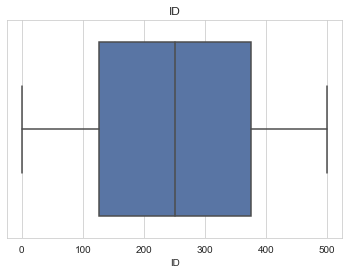

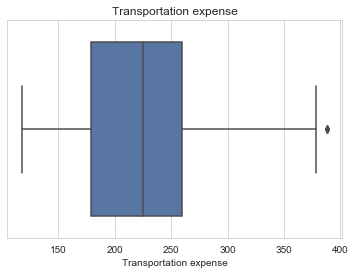

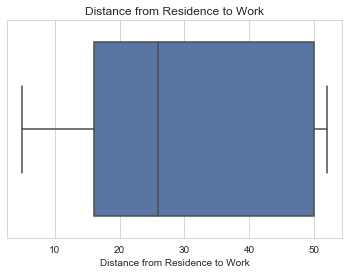

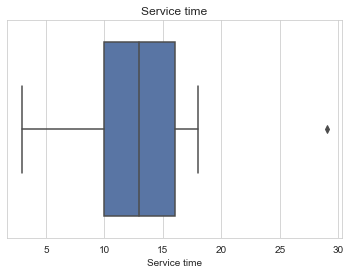

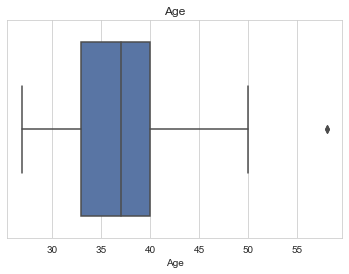

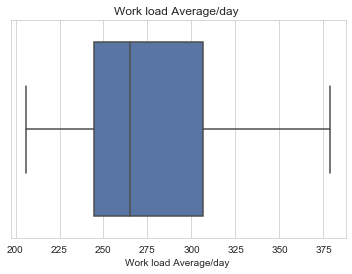

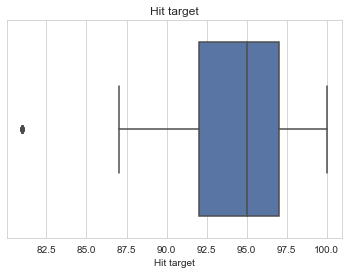

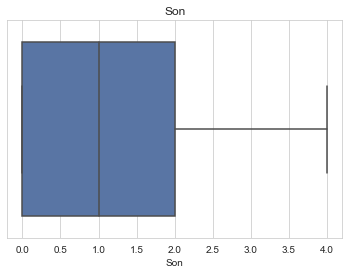

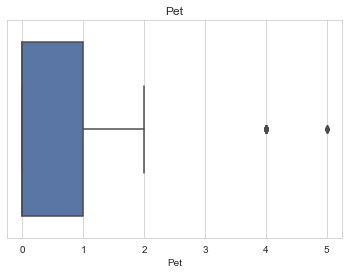

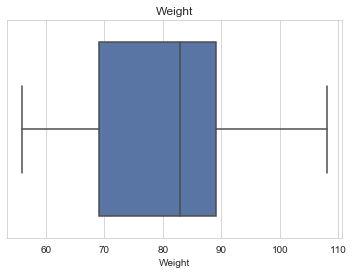

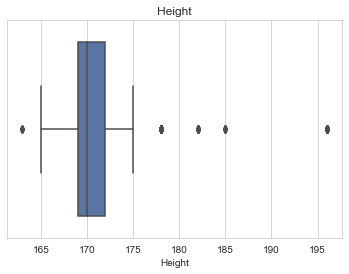

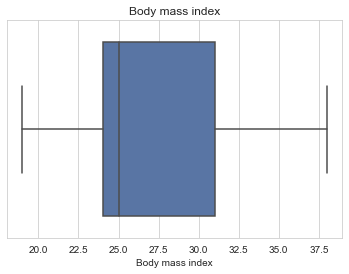

In [116]:
# Visualização dos outliers em diagramas de caixas apenas dos dados numéricos de modo a visualizar os outliers.
for i in numerical: 
    plt.figure() 
    plt.clf() 
    sns.boxplot(train[i],palette="deep") 
    plt.title(i) 
    plt.show()


In [117]:
for i in numerical:
    # Retiramos o quartil 25 e 75 da feature i
    q75, q25 = np.percentile(train[i], [75,25])
    # Calculamos o interquartil
    iqr = q75 - q25
    # Calculamos os extremos
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    # Substituimos os outliers por NA
    train.loc[train[i]< minimum,i] = np.nan
    train.loc[train[i]> maximum,i] = np.nan

In [118]:
# Apos substituir todos os outliers por NA, calculou-se o número de outliers pelo que deu 130.
train.isna().sum().sum()

130

In [119]:
# Testar depois com os outros imputes definidos
train = impute_median_mode(train)

In [120]:
# já preencheu os missing datas
train.isna().sum().sum()

0

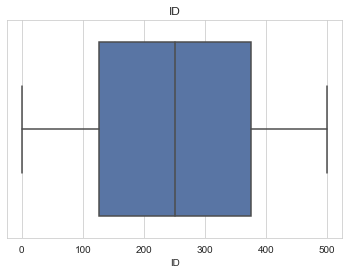

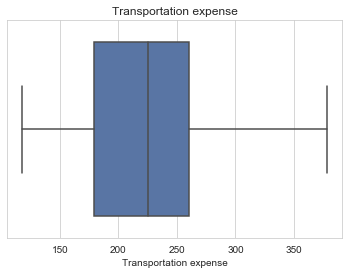

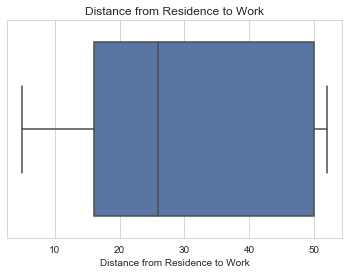

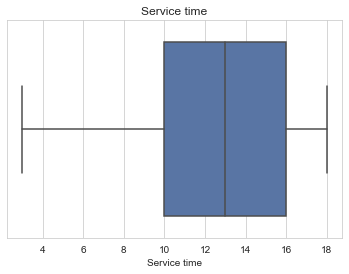

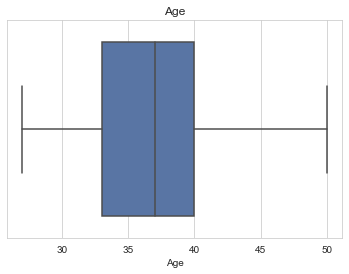

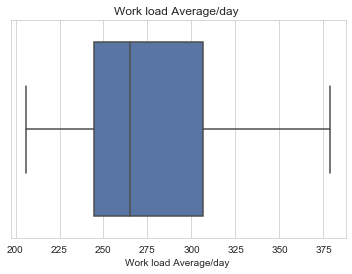

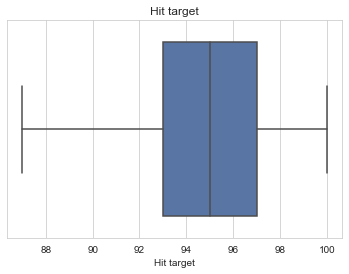

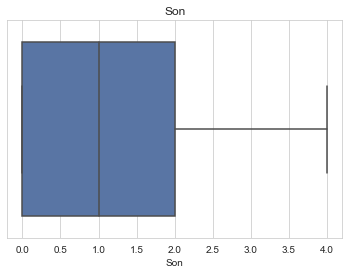

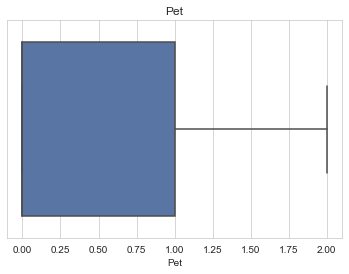

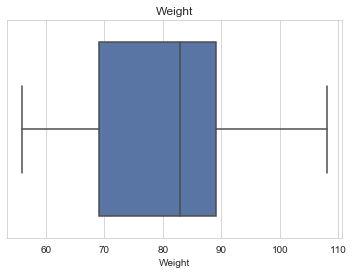

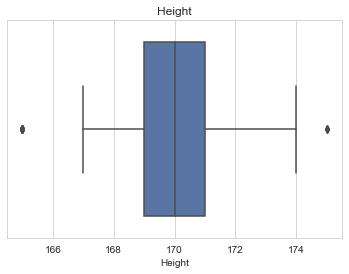

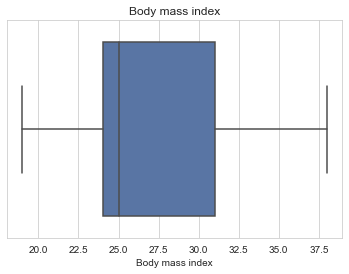

In [121]:
# Visualizar e perceber que desta maneira já não possui outliers
for i in numerical: 
    plt.figure() 
    plt.clf() 
    sns.boxplot(train[i],palette="deep") 
    plt.title(i) 
    plt.show()

# Feature selection

In [122]:
#Dataframe com todas as features numéricas com o Absent
df_corr = train.loc[:,["ID","Transportation expense","Distance from Residence to Work","Service time",
             "Age","Work load Average/day ","Hit target",
             "Son","Pet","Weight","Height","Body mass index","Absent"]]

C:\Users\joaon\AppData\Local\conda\conda\envs\env.aec\lib\site-packages\seaborn\palettes.py:777: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
C:\Users\joaon\AppData\Local\conda\conda\envs\env.aec\lib\site-packages\seaborn\palettes.py:777: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
C:\Users\joaon\AppData\Local\conda\conda\envs\env.aec\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
C:\Users\joaon\AppData\Local\conda\conda\envs\env.aec\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


[]

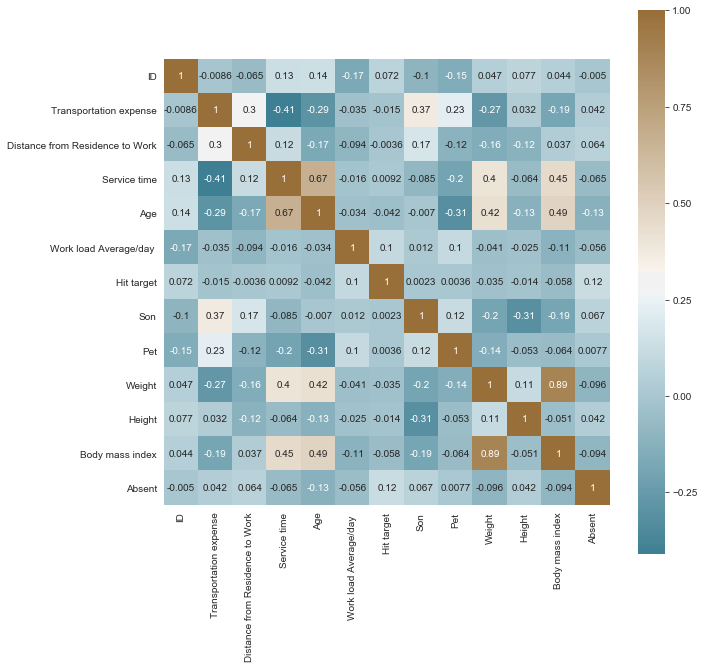

In [123]:
#Check for multicollinearity using corelation graph
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [ ]:
# decidir o que remover de seguida.

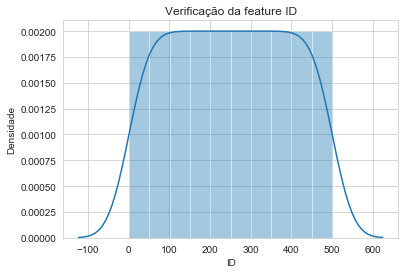

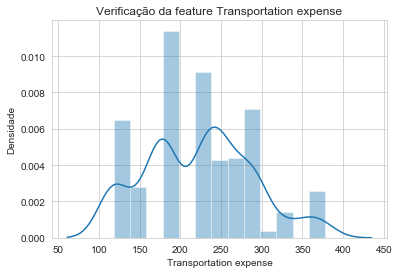

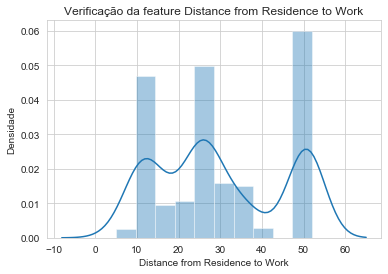

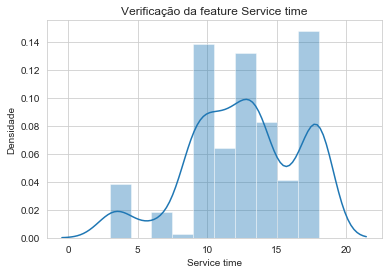

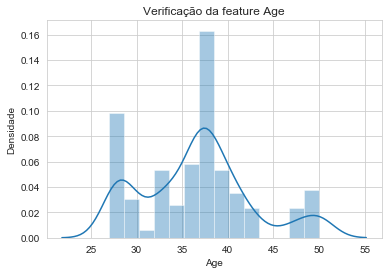

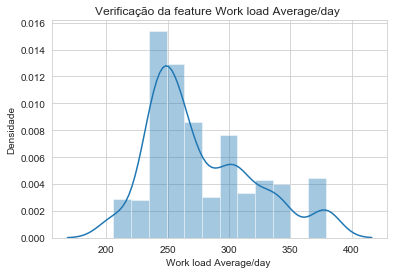

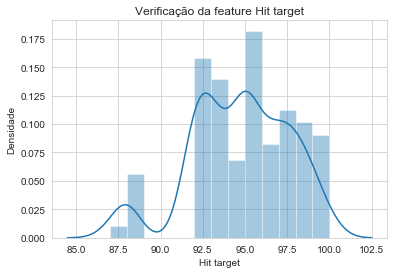

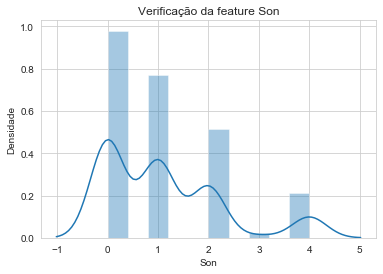

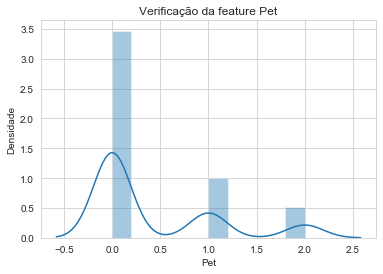

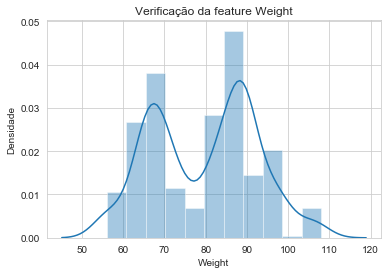

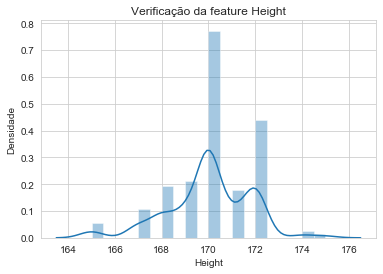

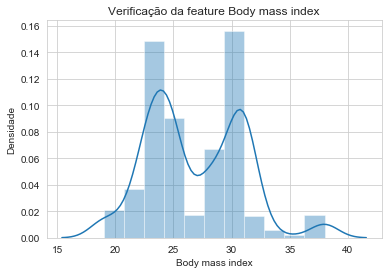

In [124]:
# Visualização das normalizações
for i in numerical:
    sns.distplot(train[i],bins = 'auto')
    plt.title("Verificação da feature "+str(i))
    plt.ylabel("Densidade")
    plt.show()

In [125]:
# Normalização das variáveis numéricas
for i in numerical:
    train[i] = (train[i] - train[i].min())/(train[i].max()-train[i].min())

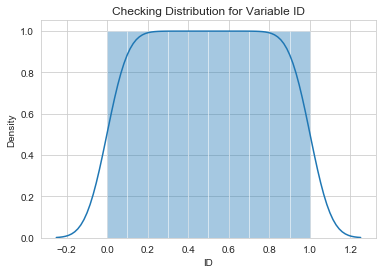

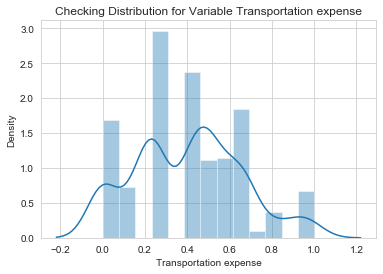

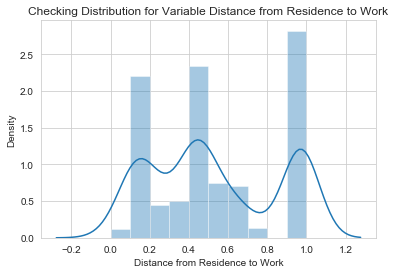

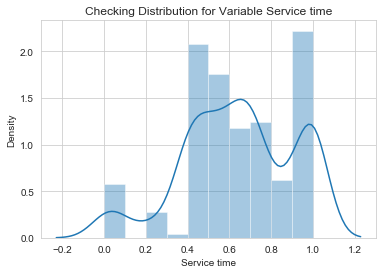

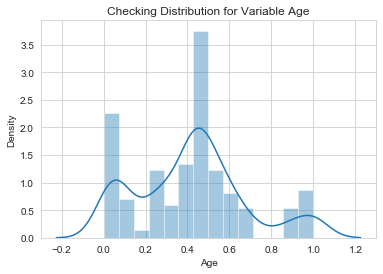

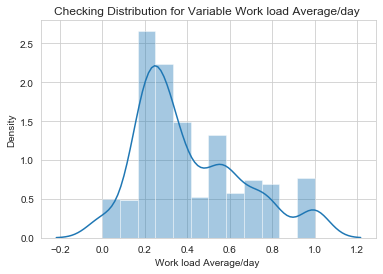

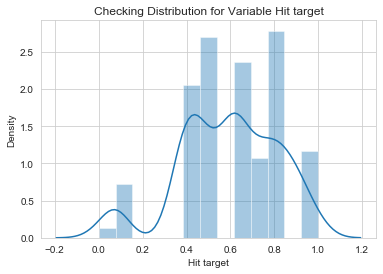

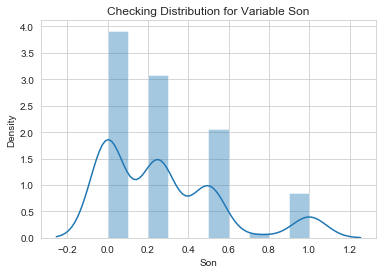

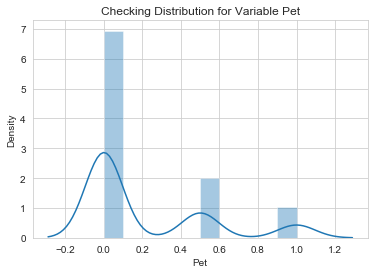

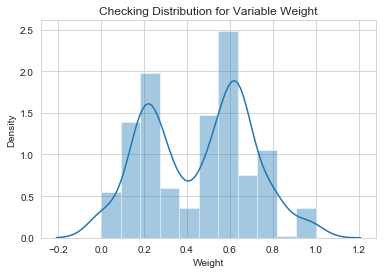

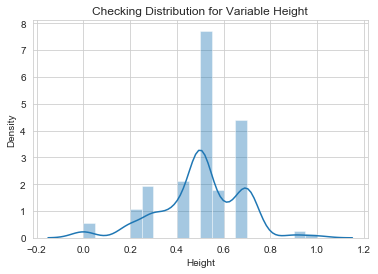

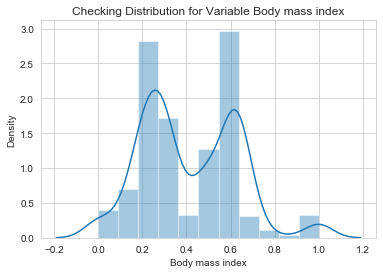

In [126]:
# Após a normalização dos dados
for i in numerical:
    sns.distplot(train[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()